In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
IPA_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/IPA_results/'

In [4]:
## read in vivo regulons
ipa_exvivo = pd.read_csv(IPA_dir + 'IPA_Alveolar_Epithelium_exvivo.csv', sep = ',')
ipa_exvivo.columns = ['Ingenuity Canonical Pathways','exvivo_minus_log_p_val','exvivo_z_score']
ipa_exvivo = ipa_exvivo[-ipa_exvivo['exvivo_z_score'].isin(['#NUM!'])]
ipa_exvivo['exvivo_z_score'] = ipa_exvivo['exvivo_z_score'].apply(pd.to_numeric, errors = 'coerce')
ipa_exvivo

,Ingenuity Canonical Pathways,exvivo_minus_log_p_val,exvivo_z_score
0,Kinetochore Metaphase Signaling Pathway,14.60,-3.355
3,Cell Cycle Control of Chromosomal Replication,11.70,-4.802
4,Sirtuin Signaling Pathway,11.20,-0.239
5,Senescence Pathway,8.89,-0.318
6,ID1 Signaling Pathway,8.36,-1.068
...,...,...,...
680,Th17 Activation Pathway,0.00,0.000
681,T Cell Exhaustion Signaling Pathway,0.00,1.342
682,Systemic Lupus Erythematosus In T Cell Signali...,0.00,-2.673
683,Systemic Lupus Erythematosus In B Cell Signali...,0.00,0.762


In [5]:
## read in vivo regulons
ipa_invivo = pd.read_csv(IPA_dir + 'IPA_Alveolar_Epithelium_invivo.csv', sep = ',')
ipa_invivo.columns = ['Ingenuity Canonical Pathways','invivo_minus_log_p_val','invivo_z_score']
ipa_invivo = ipa_invivo[-ipa_invivo['invivo_z_score'].isin(['#NUM!'])]
ipa_invivo['invivo_z_score'] = ipa_invivo['invivo_z_score'].apply(pd.to_numeric, errors = 'coerce')
ipa_invivo

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score
0,Sirtuin Signaling Pathway,14.20,0.405
2,Estrogen Receptor Signaling,9.78,2.460
4,Oxidative Phosphorylation,9.45,2.967
6,Superpathway of Cholesterol Biosynthesis,8.84,-3.300
8,EIF2 Signaling,8.36,0.324
...,...,...,...
640,"NER (Nucleotide Excision Repair, Enhanced Path...",0.00,1.265
642,T Cell Exhaustion Signaling Pathway,0.00,1.291
643,Systemic Lupus Erythematosus In T Cell Signali...,0.00,3.046
644,Systemic Lupus Erythematosus In B Cell Signali...,0.00,2.219


In [6]:
ipa = pd.merge(ipa_invivo, ipa_exvivo, on='Ingenuity Canonical Pathways')
ipa

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
0,Sirtuin Signaling Pathway,14.20,0.405,11.200,-0.239
1,Estrogen Receptor Signaling,9.78,2.460,5.380,-2.345
2,Oxidative Phosphorylation,9.45,2.967,3.320,-5.145
3,Superpathway of Cholesterol Biosynthesis,8.84,-3.300,3.670,-3.207
4,EIF2 Signaling,8.36,0.324,1.980,-2.667
...,...,...,...,...,...
396,"NER (Nucleotide Excision Repair, Enhanced Path...",0.00,1.265,7.630,-3.363
397,T Cell Exhaustion Signaling Pathway,0.00,1.291,0.000,1.342
398,Systemic Lupus Erythematosus In T Cell Signali...,0.00,3.046,0.000,-2.673
399,Systemic Lupus Erythematosus In B Cell Signali...,0.00,2.219,0.000,0.762


In [7]:
ipa_diverging_2 = ipa[(ipa['invivo_z_score'] > +1) & (ipa['exvivo_z_score'] < -1)]
ipa_diverging_2.head(25)

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
1,Estrogen Receptor Signaling,9.78,2.460,5.380,-2.345
2,Oxidative Phosphorylation,9.45,2.967,3.320,-5.145
13,Oxytocin Signaling Pathway,6.87,1.213,4.050,-2.753
14,Necroptosis Signaling Pathway,6.87,1.769,3.940,-3.175
17,Adrenomedullin signaling pathway,6.71,1.732,3.700,-2.885
25,IL-8 Signaling,6.28,3.727,3.300,-1.372
29,Cholecystokinin/Gastrin-mediated Signaling,5.89,3.087,1.680,-1.347
37,HGF Signaling,5.59,1.768,5.030,-1.095
39,NRF2-mediated Oxidative Stress Response,5.55,1.715,2.420,-1.976
46,Signaling by Rho Family GTPases,5.34,3.753,2.490,-2.412


In [8]:
ipa_diverging_1 = ipa[(ipa['invivo_z_score'] < -1) & (ipa['exvivo_z_score'] > +1)]
ipa_diverging_1.head(15)

,Ingenuity Canonical Pathways,invivo_minus_log_p_val,invivo_z_score,exvivo_minus_log_p_val,exvivo_z_score
9,Sumoylation Pathway,7.10,-1.177,3.65,3.272
80,RHOGDI Signaling,3.95,-2.920,3.03,1.219
165,Cell Cycle: G1/S Checkpoint Regulation,2.52,-1.069,6.71,1.890


In [9]:
pathways = ['Estrogen Receptor Signaling','Oxytocin Signaling Pathway','Necroptosis Signaling Pathway',
            'Adrenomedullin signaling pathway','IL-8 Signaling','RAN Signaling',
            'HGF Signaling','NRF2-mediated Oxidative Stress Response','IL-1 Signaling','Sumoylation Pathway','RHOGDI Signaling'
]

In [10]:
ipa = ipa[ipa['Ingenuity Canonical Pathways'].isin(pathways)]

In [11]:
diverging_invivo = ipa[['Ingenuity Canonical Pathways','invivo_z_score']]
diverging_invivo = diverging_invivo.sort_values(by = 'invivo_z_score', ascending = False)
diverging_invivo.rename(columns = {'invivo_z_score':'z-score'}, inplace = True)
diverging_invivo['condition'] = 'invivo'
diverging_exvivo = ipa[['Ingenuity Canonical Pathways','exvivo_z_score']]
diverging_exvivo.rename(columns = {'exvivo_z_score':'z-score'}, inplace = True)
diverging_exvivo['condition'] = 'exvivo'

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/tmp/ipykernel_2175590/1890095800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverging_exvivo['condition'] = 'exvivo'


In [12]:
diverging_induced = pd.concat([diverging_invivo, diverging_exvivo], axis=0)

In [13]:
diverging_induced

,Ingenuity Canonical Pathways,z-score,condition
25,IL-8 Signaling,3.727,invivo
1,Estrogen Receptor Signaling,2.460,invivo
98,IL-1 Signaling,2.183,invivo
14,Necroptosis Signaling Pathway,1.769,invivo
37,HGF Signaling,1.768,invivo
17,Adrenomedullin signaling pathway,1.732,invivo
39,NRF2-mediated Oxidative Stress Response,1.715,invivo
83,RAN Signaling,1.667,invivo
13,Oxytocin Signaling Pathway,1.213,invivo
9,Sumoylation Pathway,-1.177,invivo


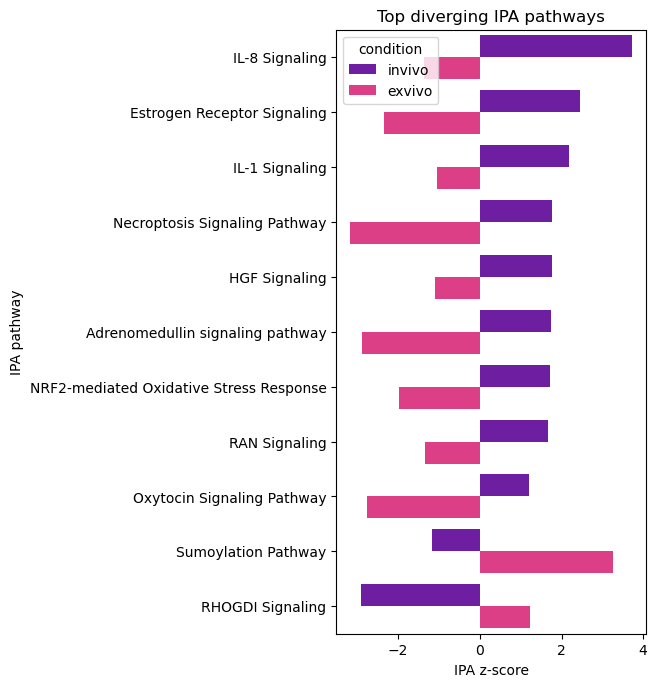

In [14]:
sb.barplot(data = diverging_induced,
           x = 'z-score',
           y = 'Ingenuity Canonical Pathways',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top diverging IPA pathways',
                xlabel = 'IPA z-score',
                ylabel = 'IPA pathway',
                #xlim = (-1.5,2)
               )
plt.savefig(fig_dir + 'barplot_Alveolear_Epithelium_IPA_diverging_pathways.pdf')
plt.show()